In [1]:
import numpy as np
import pandas as pd
import seaborn as sb

## Reading data from results

In [2]:
# Read data from results.csv
results = pd.read_csv("results.csv")
results

,size,sort_type,input_type,micro_time,comparisons
0,0,insertion,ascending,0.741571,0.00
1,0,merge,ascending,0.749857,0.00
2,0,hybrid,ascending,0.744000,0.00
3,0,insertion,descending,0.748714,0.00
4,0,merge,descending,0.726857,0.00
...,...,...,...,...,...
2245,249,merge,descending,14.939900,977.00
2246,249,hybrid,descending,12.665700,4364.00
2247,249,insertion,random,31.871100,15667.40
2248,249,merge,random,21.960100,1670.03


In [3]:
# Get data without hybrid algo
res_no_hybrid = results[results.sort_type != "hybrid"]
res_no_hybrid

,size,sort_type,input_type,micro_time,comparisons
0,0,insertion,ascending,0.741571,0.00
1,0,merge,ascending,0.749857,0.00
3,0,insertion,descending,0.748714,0.00
4,0,merge,descending,0.726857,0.00
6,0,insertion,random,0.756857,0.00
...,...,...,...,...,...
2242,249,merge,ascending,14.376700,1008.00
2244,249,insertion,descending,59.571900,31124.00
2245,249,merge,descending,14.939900,977.00
2247,249,insertion,random,31.871100,15667.40


## a) Comparing CPU runtimes to determine a suitable S

### Checking Ascending array

<AxesSubplot:xlabel='size', ylabel='micro_time'>

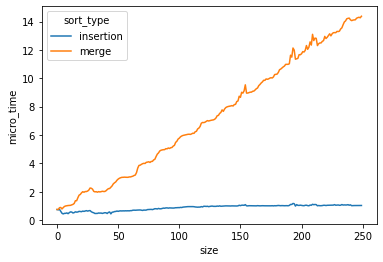

In [4]:
sb.lineplot(data=res_no_hybrid[res_no_hybrid.input_type == "ascending"],
           x="size", y="micro_time", hue="sort_type")

Based on the graph, we can see that for **ascending** data, **Insertion Sort runs in constant time**, and is also the most efficient!

### Checking Descending array

<AxesSubplot:xlabel='size', ylabel='micro_time'>

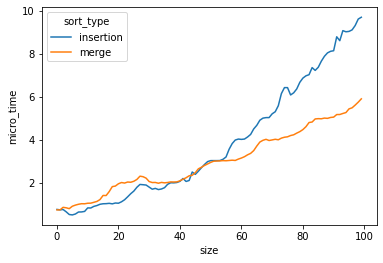

In [12]:
sb.lineplot(data=res_no_hybrid[res_no_hybrid.input_type == "descending"][:200], 
            x="size", y="micro_time", hue="sort_type")

Based on the graph, we can see that for **descending** data, the threshold S would most likely be **~35-55**.

### Checking Random array

<AxesSubplot:xlabel='size', ylabel='micro_time'>

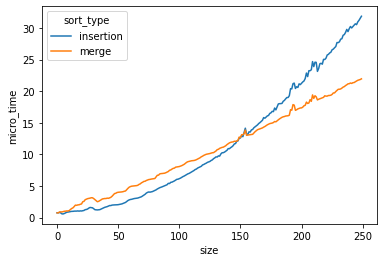

In [13]:
sb.lineplot(data=res_no_hybrid[res_no_hybrid.input_type == "random"], 
            x="size", y="micro_time", hue="sort_type")

Based on the graph, we can see that for **random** data, the threshold S would most likely be **~150-170**.

## b) Merge vs Hybrid Sort

### Checking Ascending array

<AxesSubplot:xlabel='size', ylabel='comparisons'>

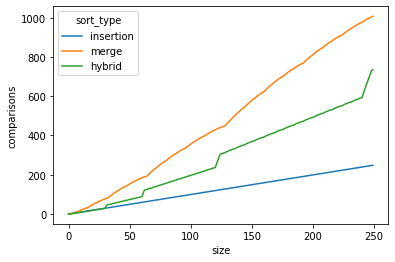

In [7]:
sb.lineplot(data=results[results.input_type == "ascending"],
            x="size", y="comparisons", hue="sort_type")

In the best case, we can see **Insertion Sort making O(n) comparisons**.

**Merge Sort continues its divide-and-conquer approach** (and so does **Hybrid Sort**), which results in more comparisons, but **Hybrid Sort makes less comparisons to Merge Sort** as it implements insertion under a certain threshold (which in this case we have decided on as 30).

### Checking Descending array

Based on above results, we know that the threshold we should set for **descending** ordered arrays should be around 35-55.

In this case, we use **35** as the threshold.

<AxesSubplot:xlabel='size', ylabel='comparisons'>

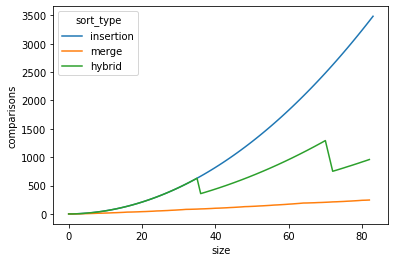

In [15]:
sb.lineplot(data=results[results.input_type == "descending"][:250], 
            x="size", y="comparisons", hue="sort_type")

We can see that the **Hybrid Sort** follows the **same number of comparisons as Insertion Sort** until the threshold.

### Checking Random array

Based on above results, we know that the threshold we should set for **random** ordered arrays should be around 150-170.

In this case, we use **165** as the threshold.

<AxesSubplot:xlabel='size', ylabel='comparisons'>

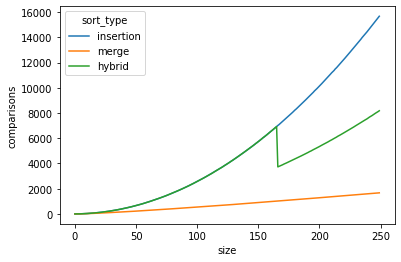

In [9]:
sb.lineplot(data=results[results.input_type == "random"], 
            x="size", y="comparisons", hue="sort_type")

Likewise, we see **Hybrid Sort** following the same number of comparisons as Insertion Sort until the threshold.

#### Notes regarding number of comparisons
In all cases (except ascending order), we can see that **Insertion Sort** makes more comparisons than either **Merge Sort** or **Hybrid Sort**.

In addition, the number of comparisons made by **Hybrid Sort** is always more than **Merge Sort**. This makes sense, since **Hybrid Sort makes use of Insertion Sort at smaller array lengths**.

## Using results of study (comparing Merge vs Hybrid Sort runtimes)

Now that we know the thresholds required, let us take a look at the timings for **Hybrid Sort** for **random** ordered arrays, using a good guess for the threshold.

<AxesSubplot:xlabel='size', ylabel='micro_time'>

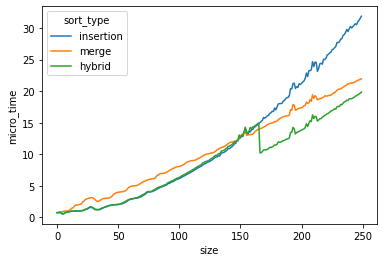

In [10]:
sb.lineplot(data=results[results.input_type == "random"],
            x="size", y="micro_time", hue="sort_type")

For **random** ordered arrays, we can see that **Hybrid Sort** is able to achieve lower runtimes than a **pure Merge Sort** by setting a good guess for a threshold (in this case, it is 165 for random).